# Tree-based methods


- Like regression, trees attempt to approximate a target (regression) function


- Most tree-based methods do variable selection automatically


- Decision trees can be easier to understand than regression


- might be good in cases where client stresses they want a model they can understand easily


- Unlike, regression, trees partition the $X$ space into rectangular blocks


- The *decision tree* below attempts to approximate the prediction function
$$f(\text{Outlook, Humidity, Wind}) \rightarrow \text{Play Tennis?}$$

![tennis tree](./tennisTree.png)

- Tree above:
    - each decision node (rectangle) tests one feature (variable)
    - each branch (edge) selects one value for the feature above
    - each leaf node (circle) predicts the label (outcome)

### Spam Data
From the authors:


- The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 


- Our collection of spam e-mails came from our postmaster and individuals who had filed spam


- Our collection of non-spam e-mails came from filed work and personal e-mails
    - hence the word 'george' and the area code '650' are indicators of non-spam


- These are useful when constructing a personalized spam filter


- One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate general purpose spam filter


- Source: Cranor, Lorrie F., LaMacchia, Brian A. Spam! Communications of the ACM, 41(8):74-83, 1998.


**Attribute Information:**

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 

48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail

Variables:
- outcome: 1, 0.    | spam, non-spam classes

1. `word_freq_make`:         continuous.
2. `word_freq_address`:      continuous.
3. `word_freq_all`:          continuous.
4. `word_freq_3d`:           continuous.
5. `word_freq_our`:          continuous.
6. `word_freq_over`:         continuous.
7. `word_freq_remove`:       continuous.
8. `word_freq_internet`:     continuous.
9. `word_freq_order`:        continuous.
10. `word_freq_mail`:         continuous.
11. `word_freq_receive`:      continuous.
12. `word_freq_will`:         continuous.
13. `word_freq_people`:       continuous.
14. `word_freq_report`:       continuous.
15. `word_freq_addresses`:    continuous.
16. `word_freq_free`:         continuous.
17. `word_freq_business`:     continuous.
18. `word_freq_email`:        continuous.
19. `word_freq_you`:          continuous.
20. `word_freq_credit`:       continuous.
21. `word_freq_your`:         continuous.
22. `word_freq_font`:         continuous.
23. `word_freq_000`:          continuous.
24. `word_freq_money`:        continuous.
25. `word_freq_hp`:           continuous.
26. `word_freq_hpl`:          continuous.
27. `word_freq_george`:       continuous.
28. `word_freq_650`:          continuous.
29. `word_freq_lab`:          continuous.
30. `word_freq_labs`:         continuous.
31. `word_freq_telnet`:       continuous.
32. `word_freq_857`:          continuous.
33. `word_freq_data`:         continuous.
34. `word_freq_415`:          continuous.
35. `word_freq_85`:           continuous.
36. `word_freq_technology`:   continuous.
37. `word_freq_1999`:         continuous.
38. `word_freq_parts`:        continuous.
39. `word_freq_pm`:           continuous.
40. `word_freq_direct`:       continuous.
41. `word_freq_cs`:           continuous.
42. `word_freq_meeting`:      continuous.
43. `word_freq_original`:     continuous.
44. `word_freq_project`:      continuous.
45. `word_freq_re`:           continuous.
46. `word_freq_edu`:          continuous.
47. `word_freq_table`:        continuous.
48. `word_freq_conference`:   continuous.
49. `char_freq_;`:            continuous.
50. `char_freq_(`:            continuous.
51. `char_freq_\[`:            continuous.
52. `char_freq_!`:            continuous.
53. `char_freq_\$`:            continuous.
54. `char_freq_#`:            continuous.
55. `capital_run_length_average`: continuous.
56. `capital_run_length_longest`: continuous.
57. `capital_run_length_total`:   continuous.


- Question: What might we want to pay particular attention to for this analysis? (choose all that apply)
    - A. Casual relationship between variables
    - B. Outliers
    - C. Overfitting
    - D. Interpretability
    - E. Multicollinearity

$$\\[0.5in]$$

- Let's start by looking at the data itself

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

# load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
col_names = [f'X{num}' for num in range(1,58)] # remember zero indexing
col_names.append('Y')
df = pd.read_csv(url, names=col_names, )
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')
df.head()

Number of rows: 4601
Number of columns: 58


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


- we know that the data only has continuous variables


- these data have many columns, so it isn't feasible to show many plots


- I'm showing the first 10

In [2]:
df.describe().transpose().head(10)

,count,mean,std,min,25%,50%,75%,max
X1,4601.0,0.104553,0.305358,0.0,0.0,0.0,0.00,4.54
X2,4601.0,0.213015,1.290575,0.0,0.0,0.0,0.00,14.28
X3,4601.0,0.280656,0.504143,0.0,0.0,0.0,0.42,5.10
X4,4601.0,0.065425,1.395151,0.0,0.0,0.0,0.00,42.81
X5,4601.0,0.312223,0.672513,0.0,0.0,0.0,0.38,10.00
X6,4601.0,0.095901,0.273824,0.0,0.0,0.0,0.00,5.88
X7,4601.0,0.114208,0.391441,0.0,0.0,0.0,0.00,7.27
X8,4601.0,0.105295,0.401071,0.0,0.0,0.0,0.00,11.11
X9,4601.0,0.090067,0.278616,0.0,0.0,0.0,0.00,5.26
X10,4601.0,0.239413,0.644755,0.0,0.0,0.0,0.16,18.18


- Seeing how many columns have at least one missing value

In [3]:
# checking for missing data
[name for name, missing in 
 zip(col_names, df.isnull().any(axis=1).to_list()) if missing]


[]

- No columns have any missing values


- Let's look at mean values by the outcome, spam vs no spam

In [4]:
means_dat =df.groupby('Y').mean()
means_dat.transpose().head(10)

Y,0,1
X1,0.073479,0.152339
X2,0.244466,0.164650
X3,0.200581,0.403795
X4,0.000886,0.164672
X5,0.181040,0.513955
X6,0.044544,0.174876
X7,0.009383,0.275405
X8,0.038415,0.208141
X9,0.038049,0.170061
X10,0.167170,0.350507


- It can be tricky to do EDA with this many variables


- Remember that we're just trying to get more familiar with the data and look for anything that might be strange


- Because the outcome is binary, bar plots make sense but in this case, it is too many to display intelligibly

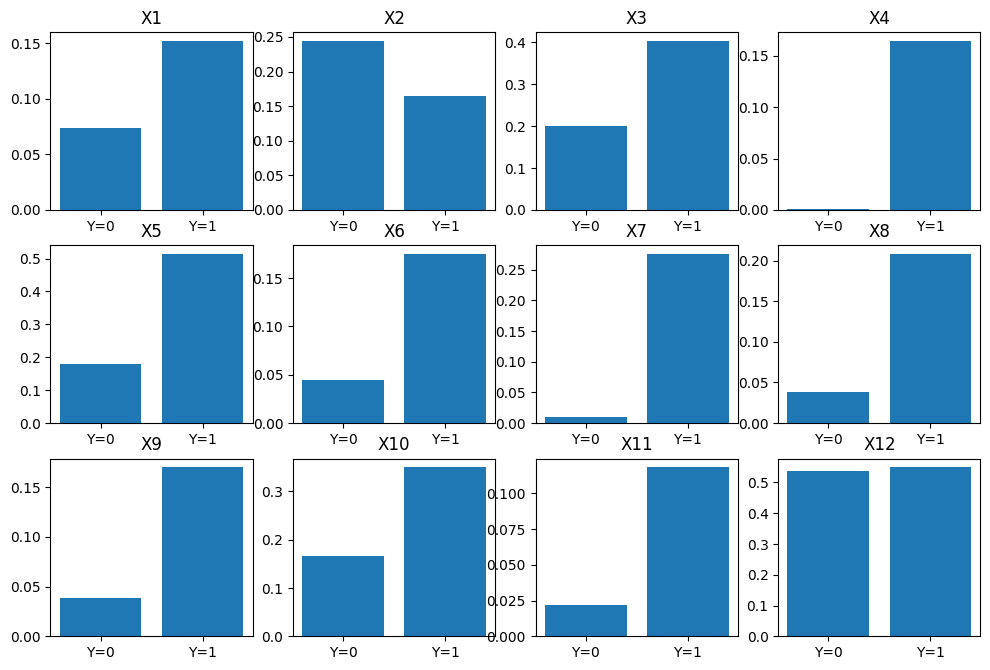

In [5]:
plot_rows, plot_columns = (3,4)
fig, axs = plt.subplots(plot_rows, plot_columns)
axs = axs.ravel()
for itr in range(plot_rows*plot_columns):
    axs[itr].bar(x=['Y=0', 'Y=1'], height=col_names[itr], 
                 data=means_dat)
    axs[itr].set_title(col_names[itr])

- Another way taking less space is to use a scatter plot

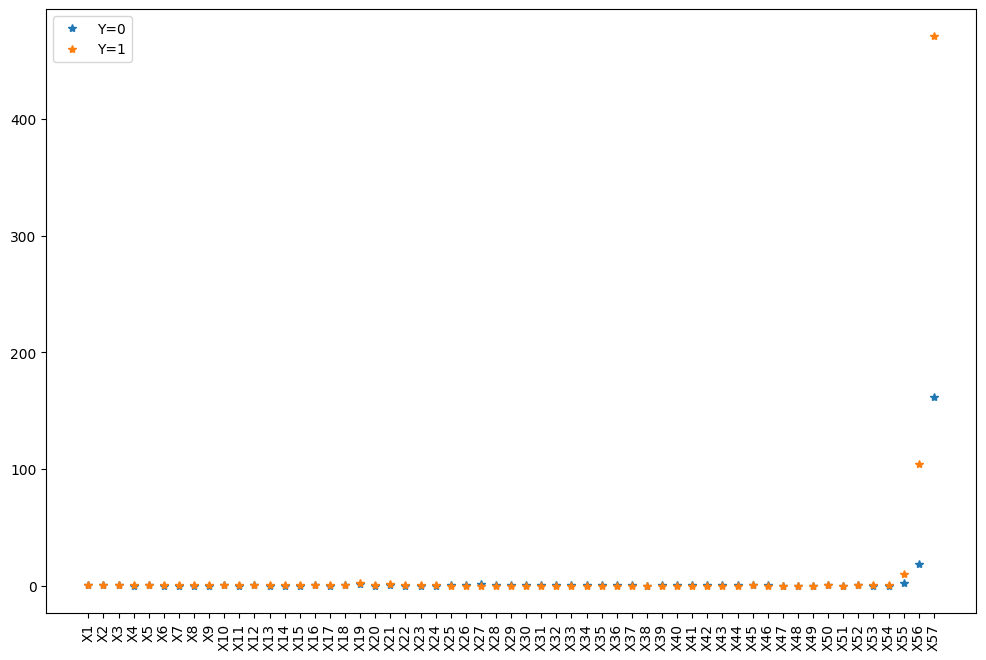

In [6]:
plt.plot(means_dat.iloc[0,:], '*', label='Y=0')
plt.plot(means_dat.iloc[1,:], '*', label='Y=1')
plt.xticks(rotation = 90)
plt.legend();

- Looking at the smaller values 

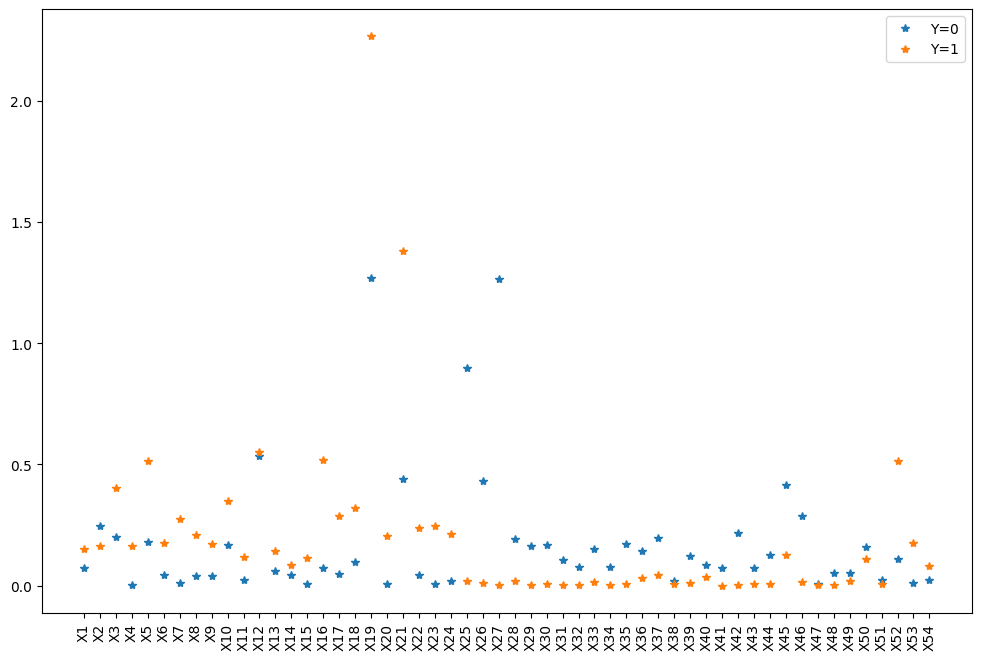

In [7]:
plt.plot(means_dat.iloc[0,0:54], '*', label='Y=0')
plt.plot(means_dat.iloc[1,0:54], '*', label='Y=1')
plt.xticks(rotation = 90)
plt.legend();

- Again, it's hard to visualize the histograms of each variable at once

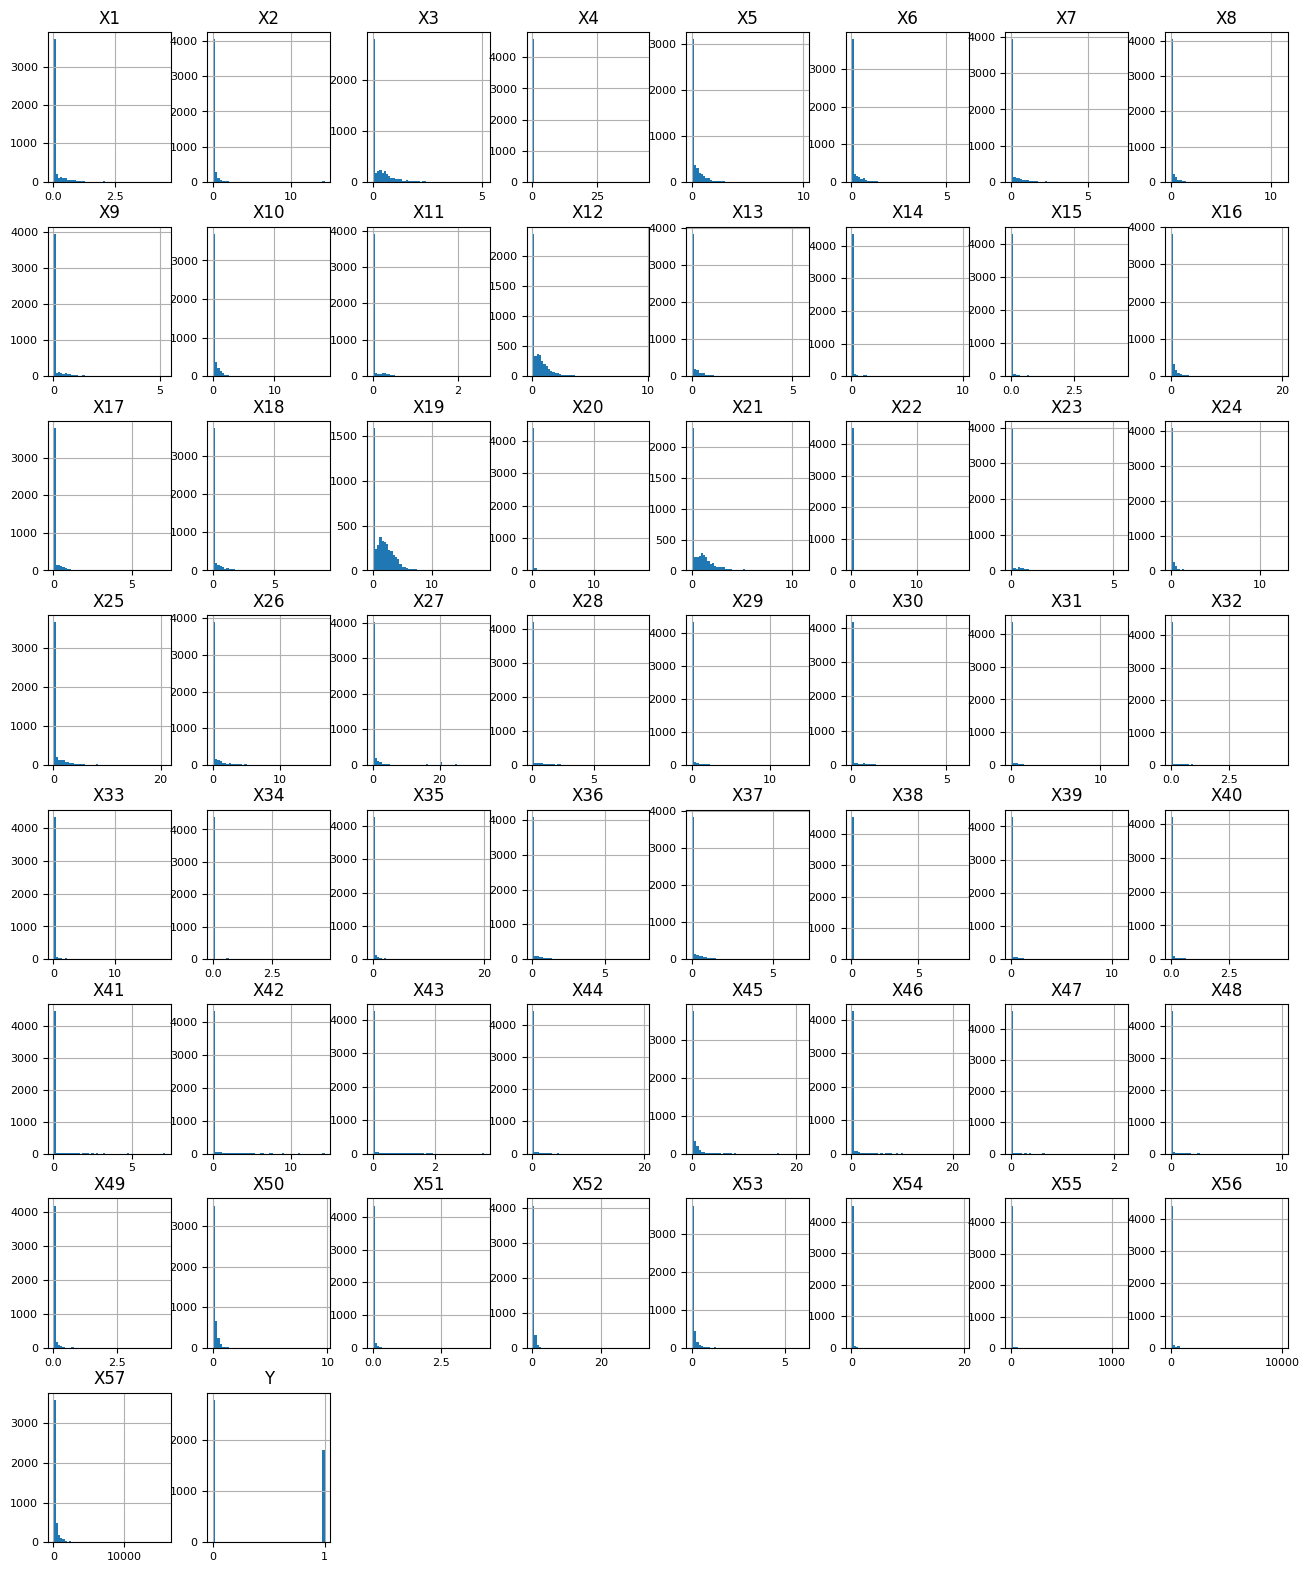

In [8]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

- Again, we can use violin plots to see the difference in distribution by outcome

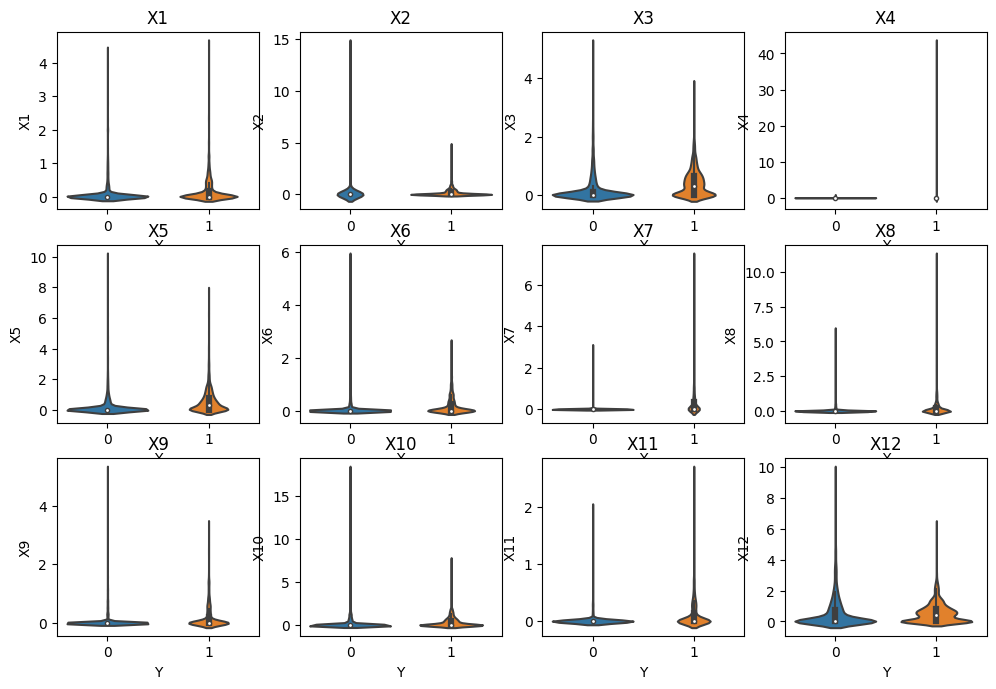

In [9]:
plot_rows, plot_columns = (3,4)
fig, axs = plt.subplots(plot_rows, plot_columns)
axs = axs.ravel()
for itr in range(plot_rows*plot_columns):
    sns.violinplot(ax=axs[itr], x='Y', y=col_names[itr], data=df)
    axs[itr].set_title(col_names[itr])

## Building a decision tree

- Decision tree are built by choosing one variable at a time to split the data


- Goal: at each split, choose variable with most information for predicting outcome


- Question: What might be a good metric to use here? (choose all that apply)
    - A. t-test absolute z-score
    - B. correlation coefficient
    - C. mutual information
    - D. Kendall's tau
    - E. Gini purity


$$\\[0.5in]$$


### Entropy and Mutual Information


- Mutual information is frequently chosen because it is non-parametric and it is defined for discrete and continuous variables
    

- Non-parametric dependence metrics can capture more than linear associations

<img src="discContPlots.png" width="600">

**Entropy**

- Definition: Assume $X$ is a random variable with density $p$.  Entropy is defined as
$$ H(X) = -E[\log p(X)]$$
    - If $X$ is discrete then
    $$H(X) = -\sum_{x\in \mathcal X} p(x)\log p(x)$$
    - If $X$ is continuous then
    $$H(X) = -\int_{\mathcal X} p(x)\log p(x) dx$$ where $\mathcal X$ is the domain of $X$ in both the discrete and continuous cases

- For a Bernoulli random variable, it is easy to plot the entropy


- It's typical in information theory to define $0\cdot \log 0 = 0$

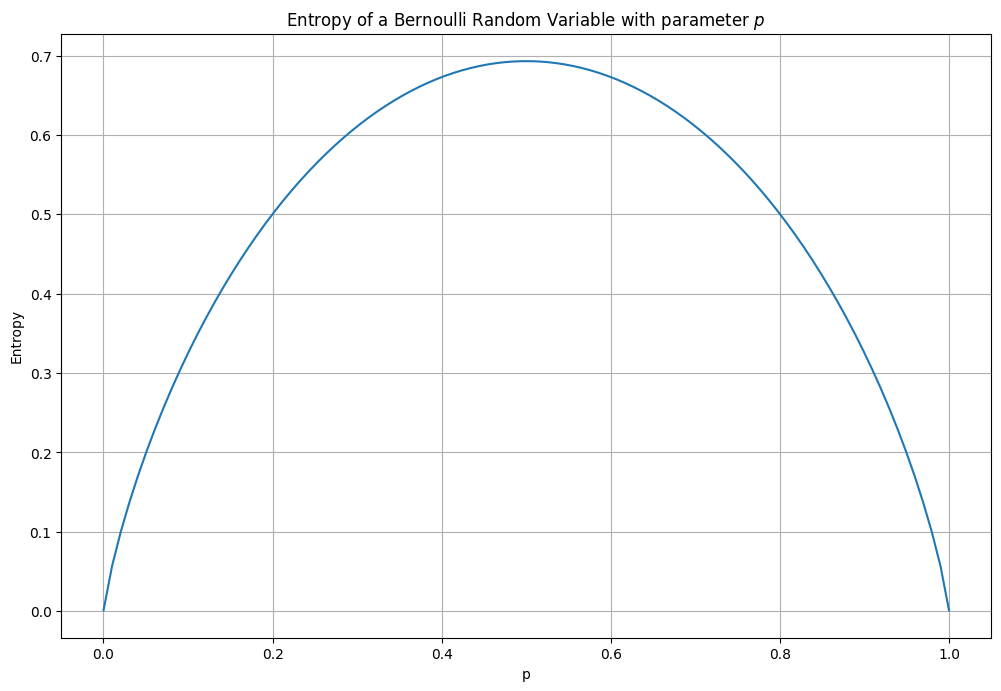

In [10]:
x = np.linspace(0.0001,0.9999,100)
y = - x*np.log(x)-(1-x)*np.log(1-x)
plt.grid(True)
plt.plot(x,y)
plt.xlabel("p")
plt.ylabel("Entropy")
plt.title("Entropy of a Bernoulli Random Variable with parameter $p$");

- We can think of entropy as quantifying the amount of randomness in a random variable
    - Or, how easy is it to predict a random variable
    - Above, a Bernoulli random variable has the most entropy when $p=0.5$
    - and least entropy when there is certainty: $p=0$ or $p=1$


- The entropy scale is not something you need to become familiar with


- It is more common to compare entropies of different random variables


- Entropy was originally defined using $\log_2$


- $H(X) \leq \log n_X$ where $n_X$ is the number of values $X$ can take


- Entropy is easily defined for random vectors, put a vector in place of $X$


- Question: Can entropy be negative?
    - A. Yes
    - B. No
    - C. Not sure

**Joint entropy** 


- Joint entropy of $X$ and $Y$ is defined as
$$H(X,Y) = -E[\log p(X,Y)]$$


- We can think of the joint entropy of the total amount of randomness in $(X,Y)$


- Question: Is it possible for $H(X) > H(X,Y)$?
    - A. Yes
    - B. No
    - C. Not sure


$$\\[0.5in]$$



- Easy to prove that if $X$ and $Y$ are independent, then $H(X,Y)=H(X)+H(Y)$
    - recall that $X\perp Y \Leftrightarrow p(x,y)=p(x)p(y)$


- If $X$ and $Y$ are dependent, then $H(X,Y) < H(X)+H(Y)$



**Conditional Entropy**

- Defined: $$H(Y|X) = -E[\log p(Y|X)] = -\int \int p(X,Y)\log p(Y|X) dxdy$$ where $p(Y|X) = \frac{p(X,Y)}{p(X)}$


- We can think of $H(Y|X)$ as the amount of randomness or uncertainty in $Y$ after removing any shared randomness with $X$


- Question: Which is possible? (select all that apply)
    - A. $H(Y|X) > H(Y)$
    - B. $H(Y|X) < H(Y)$
    - C. $H(Y|X) = H(Y)$
    - D. $H(Y|X) > H(X)$


$$\\[0.5in]$$


- Easy to show that $$H(Y|X) = H(X,Y)-H(X)$$


- If $X$ and $Y$ are independent, then $$H(Y|X) = H(Y)$$

**Entropy Estimation for discrete random variables**

- Assume $X_1,\dots, X_n$ is a random sample of size $n$


- Nearly all of the time, we do not know the true distribution of the random variable we are working with


- A common estimation approach is the *plug-in estimator*:
$$\hat H(X) = -\sum_{x\in \mathcal X}\hat p_x \log \hat p_x$$ where $\hat p_x = \frac{\#(X_i=x)}{n}$


- there are other estimators as well, this is one is probably the most frequently used in practice


- There are also estimators for continuous variables but the theory is more complex and they aren't necessary for trees

In [11]:
def estimate_entropy(samp):
    '''
    Input: n x p random variable
    Output: Entropy estimation
    '''
    val, counts = np.unique(samp, return_counts=True, axis=0)
    size = samp.shape[0]
    ent = -np.sum(np.multiply(counts/size, np.log(counts/size)))
    return(ent)

estimate_entropy(df.Y)

0.6705230209876485

### Mutual Information

- Assume $X$ and $Y$ are random variables


- Let $p(x)$ be the density of $X$, (sometimes denoted $p_X(x)$)


- Let $p(y)$ be the density of $Y$, (sometimes denoted $p_Y(y)$)



- Let $p(x,y)$ be the joint density of $X$ and $Y$, (sometimes denoted $(p_{XY}(x,y)$)


- Defined as
$$I(X,Y) = E\left[\log\left(\frac{p(X,Y)}{p(X)p(Y)}\right)\right]$$


- Easy to show that 
$$I(X,Y) = H(X)+H(Y)-H(X,Y)$$


- We can think of $I(X,Y)$ as the randomness shared between $X$ and $Y$, like a Venn Diagram:

<img src="./mutInfoVenn.png" width="300">


- Question: What does the red region indicate? (select one)
    - A. $H(X)$
    - B. $H(Y)$
    - C. $H(Y|X)$
    - D. $H(X|Y)$


$$\\[0.5in]$$


- How much information in $Y$ is also contained in $X$ or visa versa


- $I(X,Y)$ large indicates that there is a lot of shared information
    - Knowledge of $X$ is very helpful for predicting $Y$


- $I(X,Y)=0$ indicates that $X$ and $Y$ are independent
    - no shared information, like two coin flips


- Easy to show that $$I(X,Y)\geq 0$$ using Jensen's inequality
    - Jensen's inequality: If $g(x)$ is a convex function, then $g(E[X])\leq E[g(X)]$
    - Because $g(x)=-\log(x)$ is convex, $E[\log Z]\leq \log(E[Z])$ after multiplying both sizes by $-1$.  Using this,
    $$\begin{align}
    -I(X,Y)
    &=-E\left[\log\left(\frac{p_{XY}(X,Y)}{p_X(X)p_Y(Y)}\right)\right] \\
    &= E\left[\log\left(\frac{p_X(X)p_Y(Y)}{p_{XY}(X,Y)}\right)\right] \\
    &\leq \log\left(E\left[\frac{p_X(X)p_Y(Y)}{p_{XY}(X,Y)}\right]\right) \\
    &= \log\left( \int \frac{p_X(x)p_Y(y)}{p_{XY}(x,y)} p_{XY}(x,y) dxdy \right) \\
    &= \log\left( \int p_X(x)p_Y(y) dxdy \right) \\ 
    &= \log\left( \int p_X(x)dx \cdot \int p_Y(y) dy \right) \\ 
    &= \log(1) = 0
    \end{align}$$ So, $I(X,Y)\geq 0$.
- Data processing inequality: if $X \rightarrow Y \rightarrow Z$, then
$$I(X,Y) \geq I(X,Z)$$


- Information Gain: $$H(Y)-H(Y|X)$$
    - This is another way to characterize mutual information $$H(Y)-H(Y|X) = H(Y)-[H(X,Y)-H(X)] = I(X,Y)$$
    - How much information do we gain about $Y$ from using $X$
    - Most of the literature on decision tree talks about information gain rather than mutual information


**Information Estimation**
- Mutual information can be estimated in several ways


- This is also an active area of research


- For now, use $\hat I(X,Y) = \hat H(X)+ \hat H(Y)- \hat H(X,Y)$


- Consider the following simulation:
$$\begin{align}
X&\sim\text{Poisson}(5) \\
Y&\sim\text{Binomial}(X, 0.5)
\end{align}$$


- $X$ is the number of eggs an insect lays; $Y$ is the number of eggs that survive


- Question: Which of the following is most likely here? (select one)
    - A. $I(X;Y) > 0$
    - B. $I(X;Y) = 0$
    - C. $I(X;Y) < 0$
    - D. Not sure


$$\\[0.5in]$$

In [12]:
def estimate_information(samp):
    '''
    Input: nx2 array
    Output: mutual information estimate
    '''
    x_est = estimate_entropy(samp[:,0])
    y_est = estimate_entropy(samp[:,1])
    xy_est = estimate_entropy(samp)
    return(x_est+y_est-xy_est)


size = 1000
np.random.seed(1234)
x_samp = np.random.poisson(5, size)
y_samp = np.random.binomial(x_samp, 0.5*np.ones(size))
xy_samp = np.column_stack((x_samp,y_samp))

# sanity check
for x,y in zip(x_samp, y_samp):
    if y > x:
        print('error')

estimate_information(xy_samp)

0.45253546546297185

- Question: What does this mutual information indicate? (select all that apply)
    - A. $X \perp Y$
    - B. $X \not\perp Y$
    - C. $X\rightarrow Y$
    - D. $Y\rightarrow X$
    - E. $\text{Cov}(X,Y)\neq 0$

$$\\[0.5in]$$


- Below: 
$$\begin{align}
X&\sim\text{Poisson}(5) \\
Y&\sim\text{Binomial}(10, 0.5)
\end{align}$$


- Question: Which of the following is most likely in a simulation? (select one)
    - A. $I(X;Y) > 0$
    - B. $I(X;Y) = 0$
    - C. $I(X;Y) < 0$
    - D. Not sure


$$\\[0.5in]$$

In [13]:
np.random.seed(1234)
size = 1000
x_samp = np.random.poisson(5, size)
y_samp = np.random.binomial(10, 0.5, size)
xy_samp = np.column_stack((x_samp,y_samp))

estimate_information(xy_samp)

0.06649931890535843

- Question: Why is $\hat I(X;Y) > 0$?
    - A. $X$ and $Y$ are actually dependent when simulated
    - B. Estimation error
    - C. Small sample
    - D. Not sure


$$\\[0.5in]$$

In [14]:
np.random.seed(1234)
size = 1000000
x_samp = np.random.poisson(5, size)
y_samp = np.random.binomial(10, 0.5, size)
xy_samp = np.column_stack((x_samp,y_samp))

estimate_information(xy_samp)

9.054316079470937e-05

- Question: Why is $\hat I(X, Y)$ small than before?
    - A. Chance
    - B. New simulation
    - C. Sample size
    - D. Error

$$\\[0.5in]$$

### Algorithm for building a decision tree


- High-level algorithm for building out a (binary) tree
 
    - Find variable, $X^*$, with most information with $Y$
    - Split tree and data according to $X^*$
    - On each branch find variable with most information with $Y$ etc


- Question: What advantages are there to splitting the data (over regression)? (select all that apply)
    - A. Can use some rows with missing data
    - B. Constant variance on each split
    - C. Unbiased
    - D. Finding interactions
    - E. Non-parametric

$$\\[0.5in]$$


- This algorithm is based on [ID3](https://en.wikipedia.org/wiki/ID3_algorithm)


- Binary: each node has two outgoing branches


- Root is the first node, with all rows of data


- Each node after root, only uses a subset of the rows of data

    - subset is determined by following tree


- At  each node, the algorithm uses subset data to determine best variable to split on next
    - Choosing the variable with the most information on the outcome using data subset



- Decision trees partition data into blocks


![](./regression-tree-partition.png)
Image from datacamp.com


- Question: With more partitions (or terminal nodes), a tree becomes
    - A. Less complex
    - B. More complex
    - C. Does not determine complexity
    - D. Not sure

$$\\[0.5in]$$


**Algorithm**


- Assume $Y$ is the outcome, and $\texttt{vars}$ be all predictor variables


- For simplicity, assume that all variables are binary


1. Create empty list called $\texttt{nodes}$, create list of variables, $\texttt{vars}$


2. Add $\texttt{root}$ to $\texttt{nodes}$


3. While $\texttt{nodes}$ is not empty
    1. Pop $\texttt{node}$ from $\texttt{nodes}$ (using either breadth-first or width-first)
    2. For $X$ in $\texttt{vars}$: calculate $I(X,Y)$ on data subsetted for node
    3. Split outgoing branches on $X^* = \arg\max_{X\in\texttt{vars}} I(X,Y)$
    4. Partition data: $\{i: X_i^*=0\}$ and $\{i: X_i^*=1\}$
    5. Create branches and allocate data partitions
        1. If data perfectly classified in new: create leaf nodes
        2. Else: add new node to $\texttt{nodes}$ to be processed


- Question: When will this algorithm be suboptimal for estimating $f$ (true regression function)? (choose all that apply)
    - A. Small samples
    - B. Few variables
    - C. $Y$ independent of $\texttt{vars}$
    - D. Additive data generating process
    - E. Always due to overfitting

$$\\[0.5in]$$

### Overfitting, Pruning, and Validation


- Generally, we want our *learner* to make accurate predictions on new data that we have not yet seen


- learner: machine learning term for model


- The algorithm above will fit the true signal and random noise in the *training data*
    - training data: data used to fit the model


- Over fitting is fitting a learner to the random noise in the data


- How do we determine when over fitting occurs?


**Loss Function**


- Because our response, $Y$, is binary, we will use the *zero-one loss function*:
$$L(\hat Y, Y) = 
\begin{cases}
0 & \text{if } \hat Y = Y\\
1 & \text{if } \hat Y \neq Y
\end{cases}$$


- Note: squared error loss, $L(\hat Y, Y) = (\hat Y-Y)^2$ is used for continuous outcomes


- *Expected loss*: $$E[L(\hat Y, Y)]$$


- If we use zero-one loss, $$E[L(\hat Y, Y)] = P(\hat Y\neq Y)$$


- Goal: Choose a model $\hat Y = \hat f(x)$ to minimize expected loss:
$$\hat f = \arg\min_{f\in \mathcal F} E[L(f(x), Y)]$$


- Here, $\mathcal F$ is the class of function we are considering
    - For this lecture, $\mathcal F$ is the set of all decision trees we could use


- Note: We can define accuracy as $1-L(\hat Y, Y)$
    - Minimizing loss is the same as maximizing accuracy

**Estimating expected loss**


- Because we never know the *true regression function* (otherwise we would not need to model it), we can estimate expected loss using an average:
$$\text{error}(\hat f) = \frac{1}{n}\sum_{i=1}^n L(y_i, \hat f(x_i))$$
    - For zero-one loss, this is called the error rate


- Consider using all of the data we have to estimate $\hat f$, our decision tree, then using the same data to estimate expected loss


- Decision trees are very flexible models



- For any input observation of vector, $x$, a decision tree can choose a particular outcome


- Because of their flexibility, decision trees can easily overfit


- In fact, the tree building algorithm above *will* overfit if run until there is perfect classification


- That is, it is possible to find $\hat f$ such that
    $$\text{error}(\hat f) = 0$$

| X1 | X2 | Y |
| :-: | :-: | :-: |
| 0 | 0 | 17 |
| 0 | 1 | -42 |
| 1 | 0 | 0 |
| 1 | 1 | 5 |


![simpleoverfittree](./simpleOverfitTree.png)


    

- [Rademacher complexity](https://en.wikipedia.org/wiki/Rademacher_complexity) is the most common way to quantify model flexibility


- Question: Which model generally has the greatest Rademacher complexity?
    - A. Linear regression
    - B. Spline regression
    - C. Trees
    - D. Support vector machine

$$\\[0.5in]$$


**Validation**


- Splitting the data into two parts to use one for training and one for testing is called *held-out* validation


- Using training data to evaluate expected loss is called *training error*, denoted $$\text{error}_{\text{train}}(\hat f)$$


- A more accurate estimate of error (expected loss) is using new data, that the fitted model has not seen, to estimate error, denoted $$\text{error}_{\text{test}}(\hat f)$$

![treeOverfitting](./treeOverfitting.png)

Image from Tom Mitchell's ML 10-701 nodes

- Question: In the graph above, at how many nodes (complexity) does overfitting occur approximately? (enter numeric multiple of 10, eg 10, 20, 30, 40 etc)

$$\\[0.5in]$$


- One way to choose a learner (model) is to build/fit several learners on the training data, then choose the model with the best accuracy on the test data

**Pruning**


- How do we stop a tree from over fitting?


- Pruning is the process of collapsing non-leaf nodes within a tree


- Many tree building algorithms first build out a tree as described above, then pruned to limit overfitting

**Cost-Complexity Pruning**


- Let $T_0$ be the full tree built using the algorithm above


- Consider the $m$th leaf (terminal node) of $T_0$ and denote the data in leaf $m$ as $R_m$


- Let $T\subset T_0$ is any tree obtained from pruning $T_0$


- Define the following:
    - $|T|$ is the number of leaf nodes in $T$
    - $N_m = \#\{x_i\in R_m\}$ (number of rows of data)
    - $\hat c_m = \frac{1}{N_m}\sum_{x_i\in R_m} y_i$
    - $Q_m(T) = \frac{1}{N_m}\sum_{x_i\in R_m} (y_i-\hat c_m)^2$


- We say that the cost complexity is $$C_\alpha(T) = \sum_{m=1}^{|T|} N_m Q_m(T) +\alpha|T|$$ where $\alpha\geq 0$ is a tuning parameter controlling the tradeoff between tree size and tree fit


- Large $\alpha$ will results in a smaller tree and small $\alpha$ in a larger tree


- For each value of $\alpha$, there is a unique smallest subtree, $T_\alpha$ which minimizes $C_\alpha(T)$


- Use *weakest link pruning* to find $T_\alpha$:
    - iteratively collapse non-leaf nodes of $T_0$ that give the smallest per-node increase in $\sum_m N_m Q_m(T)$ until only the root is left
    - This process gives a finite sequence of subtrees that must contain $T_\alpha$


- In this setting, $\alpha$ is very similar to the $\lambda$ tuning parameter from splines


- Both parameter determine the balance between accuracy (fit) and model complexity


- This is a common theme in machine learning


- To estimate the best $\alpha$, use five- or ten-fold *cross validation*

**Cross Validation**


- When using held-out validation, there is left over data that was never used to train the model in the test dataset and left over data that we never used to test the model in the training dataset


- Cross validation fixes this by 
    - splitting the observations (rows) in to $k$ *folds* (subsets)
    - training $k$ models each on a subset with a different fold removed
    - testing each of the $k$ models on the fold that was not used for training

![cross validation](./cross-validation.png)


- For each observation, $i=1,\dots, n$, there is one of the $k$ models did not use observation $i$


- We use that model to get $\hat y_i$


- Expected loss is estimated by aggregating the loss or each observation across all folds $$\text{Cross-Validated Loss} = \frac{1}{n}\sum_{i=1}^n L(\hat y_i, y_i)$$


- 5 or 10 fold is what is normally use
    - there is some theoretical work showing that 5- and 10-fold cross validation (CV) are better than LOOCV
    - As far as I know, there is no theoretical work showing which is better between 5- and 10-fold CV


- Once cross validation is complete, we choose the model with the smallest cross-validated error


- It is typical to "re-fit" the optimal model/tuning parameter to the entire dataset used for CV


- In practice, it is common to 
    - set aside some fraction of the observations (5-10%) before CV
    - Choose an optimal model using using CV on the remaining majority of the observations
    - Use the set-aside data to give overall model accuracy/error

![heldout cv](./heldoutCV.png)


- Below: randomly splitting data data into a training set for cross validation and test set
    - [`pandas.DataFrame.sample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) makes this easy
    - Here, we chose 5% of the data for testing
    - Then create the training data using `pandas.DataFrame.drop` method

In [15]:
test_set = df.sample(frac=0.05)
train_set = df.drop(test_set.index)

for data in [df, test_set, train_set]:
    print(f'Rows: {data.shape[0]}, Columns: {data.shape[1]}')

Rows: 4601, Columns: 58
Rows: 230, Columns: 58
Rows: 4371, Columns: 58


- We move forward using only the training set


- In setting where test data is used for validation, it is recommended to set aside the test set before any analysis including EDA


- Below: decision tree, depth = 1 using entropy on the training data
    - This shows the single predictor for the response (spam)
    - Tree depth argument: `max_depth=1`

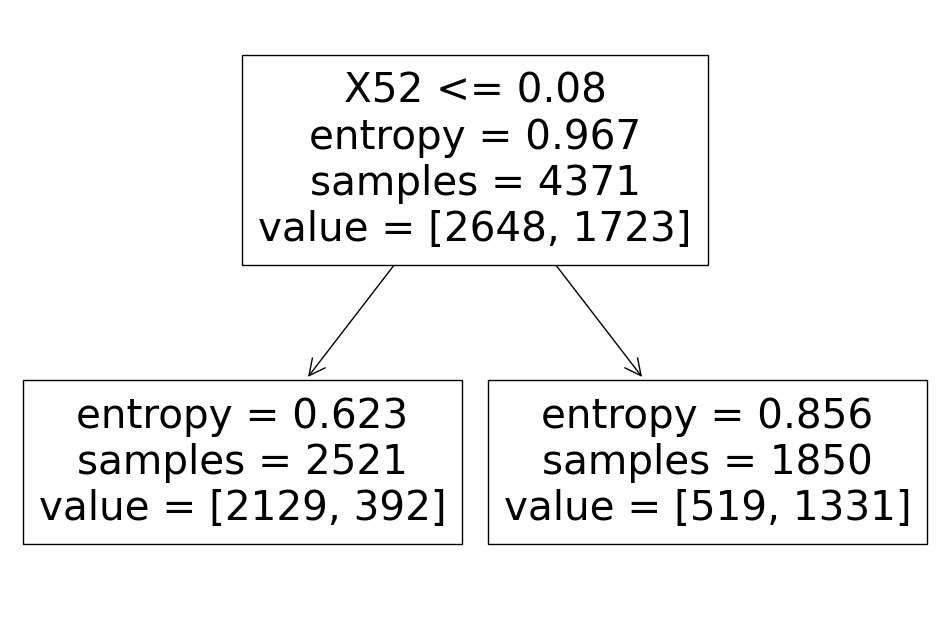

In [16]:
import sklearn
from sklearn import tree
import graphviz

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf = clf.fit(train_set.drop(columns='Y'), train_set['Y'])
tree.plot_tree(clf, feature_names=train_set.columns);

- `X52`: char_freq_\$


- Question: Why is the algorithm showing entropy rather than mutual information? (choose all that apply)
    - A. Lower entropy indicates better separation between spam/not spam
    - B. The algorithm uses mutual information, then shows the entropy in each split
    - C. Minimizing entropy is the same as maximizing mutual information
    - D. The three entropy values can be used to compute mutual information


$$\\[0.5in]$$


- Remember: Information gain is $H(Y) - H(Y|X)$ and $I(X;Y) = H(Y) - H(Y|X)$, another name for mutual information



- $H(Y|X) = -\sum_{x\in X} p(x) H(Y|X=x) = -\sum_{x\in X} p(x) \sum_{y\in Y} p(y|x)\log p(y|x)$



- $H(Y|X=x)$ is the entropy on the partitioned data for each branch


- $I(X;Y) = H(Y) +[P(X=0) H(Y|X=0) +P(X=1) H(Y|X=1)]$


- Why is the entropy estimate for `Y` in the training data so different from before?
    - $H(X) = \sum_{x\in X} \hat p \log_2 p$ used here
    - Recall: $\log_2(x) = \frac{\log(x)}{\log(2)}$

In [17]:
estimate_entropy(train_set.Y)/np.log(2)

0.9674497011084557

- Recall that all variables are continuous


- Question: How can we compute entropy for continuous random variables? (text)


$$\\[0.5in]$$


- How is entropy computed?
    - The algorithm find the best *break point* in each continuous variable to split on
    - In reality, the algorithm orders each continuous variable then uses each split

- What does `value` in the tree depiction mean?
- This can be used to give the probably of spam
- Note: X53 was used to split that data but I needed more decimals to get the exact cutoff

In [18]:
print(sklearn.tree.export_text(clf, decimals=8))
train_set[train_set.X53 <= 0.0555].Y.value_counts()

|--- feature_51 <= 0.07950000
|   |--- class: 0
|--- feature_51 >  0.07950000
|   |--- class: 1



0    2521
1     780
Name: Y, dtype: int64

**Building out full tree**

- If you do not enter tree depth or complexity constraint, the full (overfitted) tree will be created


- It is unlikely this tree will be optimal for prediction on new data


- It may also be overwhelming for the reader

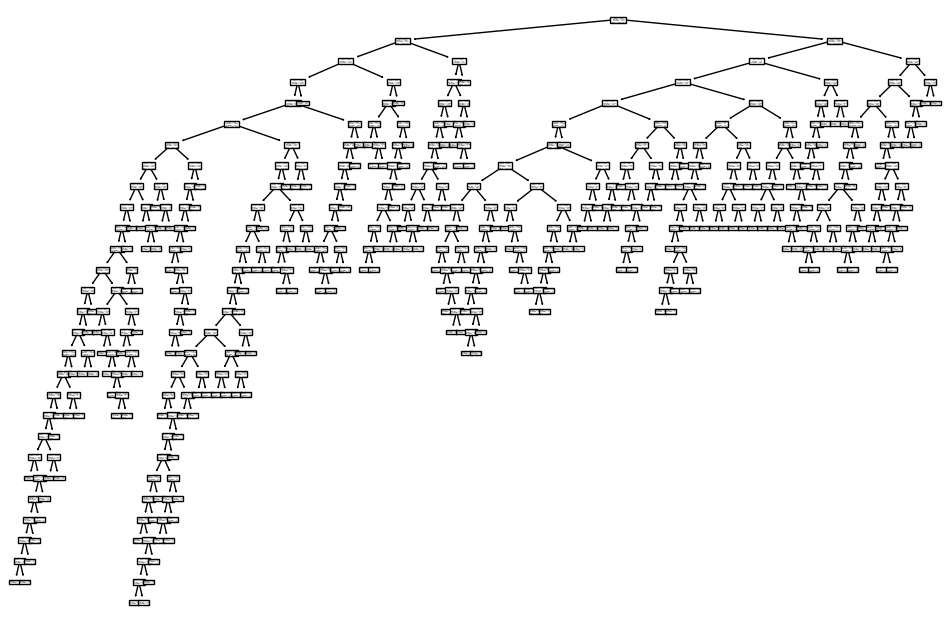

In [19]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_set.drop(columns='Y'), train_set['Y'])
tree.plot_tree(clf, feature_names=train_set.columns);

**Pruning**


- Because trees are discrete, there are finitely many possible pruned trees $T\subset T_0$


- Question: Will each pruned tree have `X53` as the first split?
    - A. Yes
    - B. No
    - C. Not sure


$$\\[0.5in]$$


- Below is a graph of leaf impurity vs complexity constraint


- A leaf is pure (impurity is zero) when it perfectly classifies the response


- See [Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) for more information



- Question: If leaf impurity is zero, what would entropy be?
    - A. Zero
    - B. Greater than zero
    - C. Not sure


$$\\[0.5in]$$

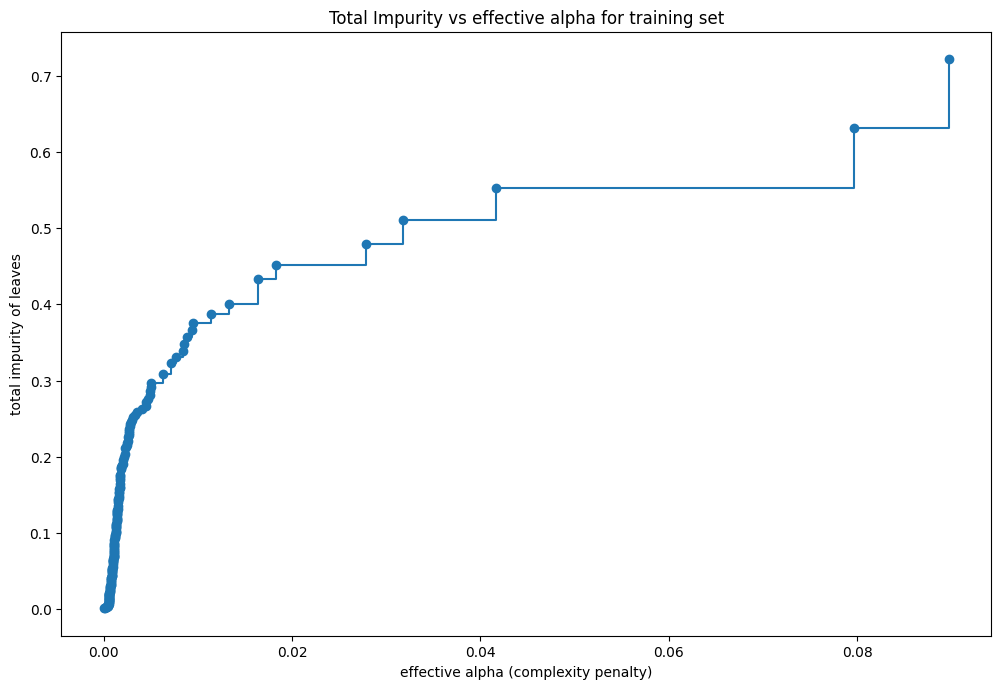

In [20]:
path = clf.cost_complexity_pruning_path(
    train_set.drop(columns='Y'), train_set['Y'])
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', 
        drawstyle="steps-post")
ax.set_xlabel("effective alpha (complexity penalty)")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

- Each point in the graphic above corresponds to a unique, smallest subtree, $T_\alpha$ which minimizes $C_\alpha(T)$


- Question: As $\alpha$ increases, the number of nodes in the corresponding tree (select one)
    - A. Increases
    - B. Decreases
    - C. Unaffected by $\alpha$
    - D. Not sure

$$\\[0.5in]$$


- $\alpha = 0$ includes no penalty for overly complex trees, corresponds to the full tree


- $\alpha\approx 0.12$ uses only the root node


- To generate tree pruned with a particular complexity penalty use `ccp_alpha`


- Below: `ccp_alpha=0.02` chosen for display (not because of fit)


- Generally, `ccp_alpha` levels will depend on data

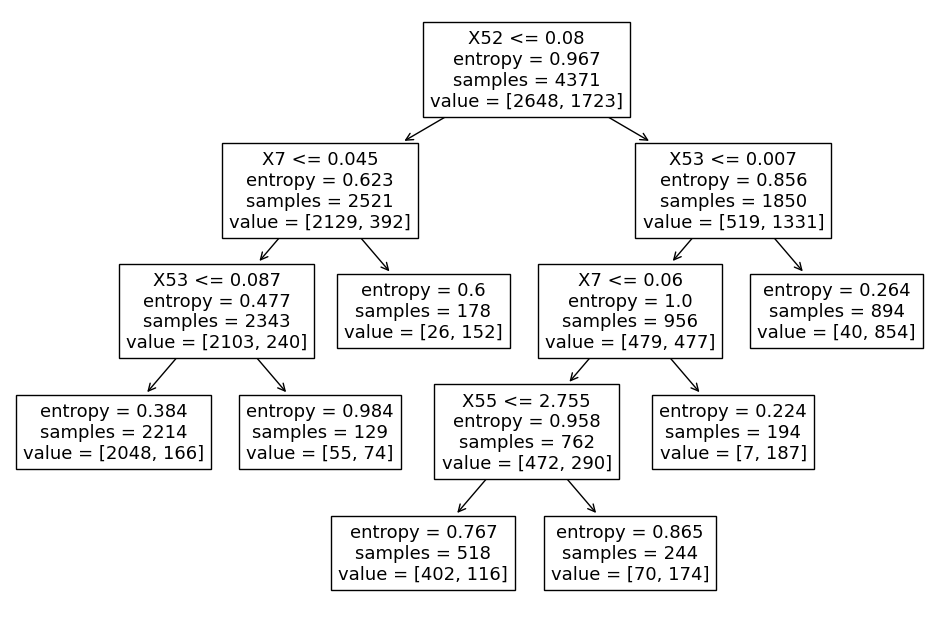

In [21]:
clf = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.02)
clf = clf.fit(train_set.drop(columns='Y'), train_set['Y'])
tree.plot_tree(clf, feature_names=train_set.columns);

- Question: Is this tree graphic publication quality?
    - A. Yes
    - B. No
    - C. Not sure


$$\\[0.5in]$$

- Question: What can be done to make this tree publication quality? (text)


$$\\[0.5in]$$

**5-fold Cross Validation**

- The code below uses `sklearn.model_selection.cross_val_score` to run cross validation


- It is also very easy to write cross validation code for this
    - Randomly assign each observation to a fold
    - Loop through removing one fold and build model
    - Get prediction for the removed fold
    - estimate expected loss


- [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) indicates the `scoring` argument sets the loss function
    - here it was clear that accuracy was used by default


- `cross_val_score` returns a loss/accuracy score for each fold
    - Here: returned 5 accuracy values


- The `for` loop goes through all different pruned tress
    - generates a total, 5-fold CV accuracy for each pruned tree


- First graph: Scatter plot of all pruned trees/5-fold accuracy vs alpha


- Second graph zooms in on first graph


- Graphs shows overfitting on very complex graphs


- Note: this code takes about 1 min to run for me

In [22]:
from sklearn.model_selection import cross_val_score

accuracy = []
for comp in path['ccp_alphas']:
    clf = tree.DecisionTreeClassifier(
        criterion='entropy', ccp_alpha=comp)
    # Perform 5-fold cross validation 
    scores = cross_val_score(
        estimator=clf, X=train_set.drop(columns='Y'), y=train_set['Y'],
        cv=5)
    accuracy.append(scores.mean())

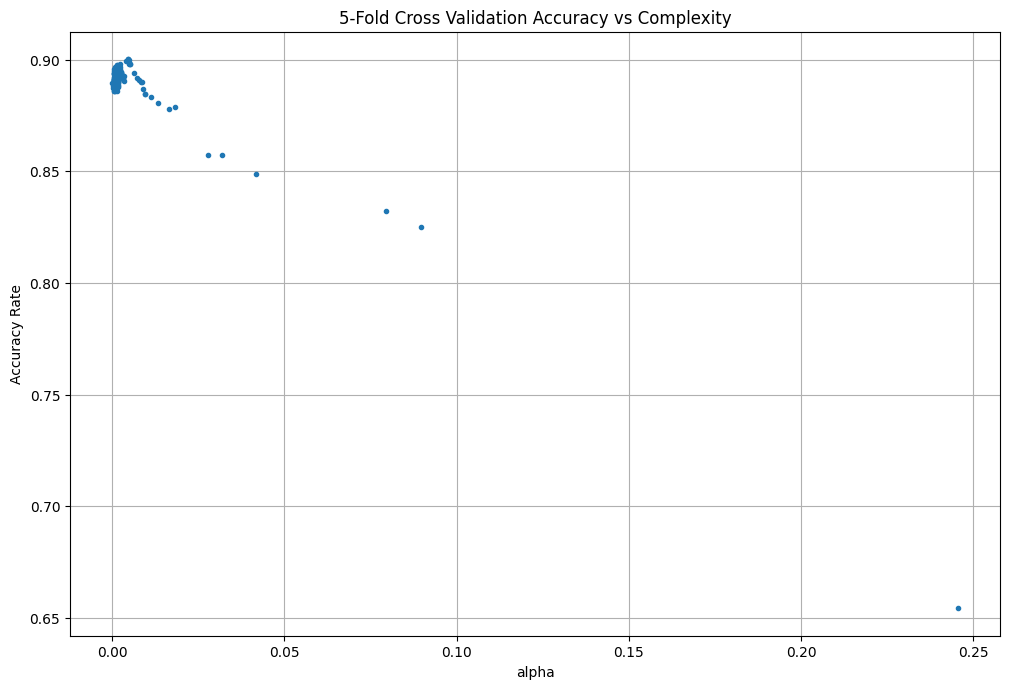

In [23]:
plt.grid(True)
plt.plot(path['ccp_alphas'], accuracy, '.')
plt.xlabel('alpha')
plt.ylabel('Accuracy Rate')
plt.title('5-Fold Cross Validation Accuracy vs Complexity');

- Hard to see what's happening here...


- Let's zoom in

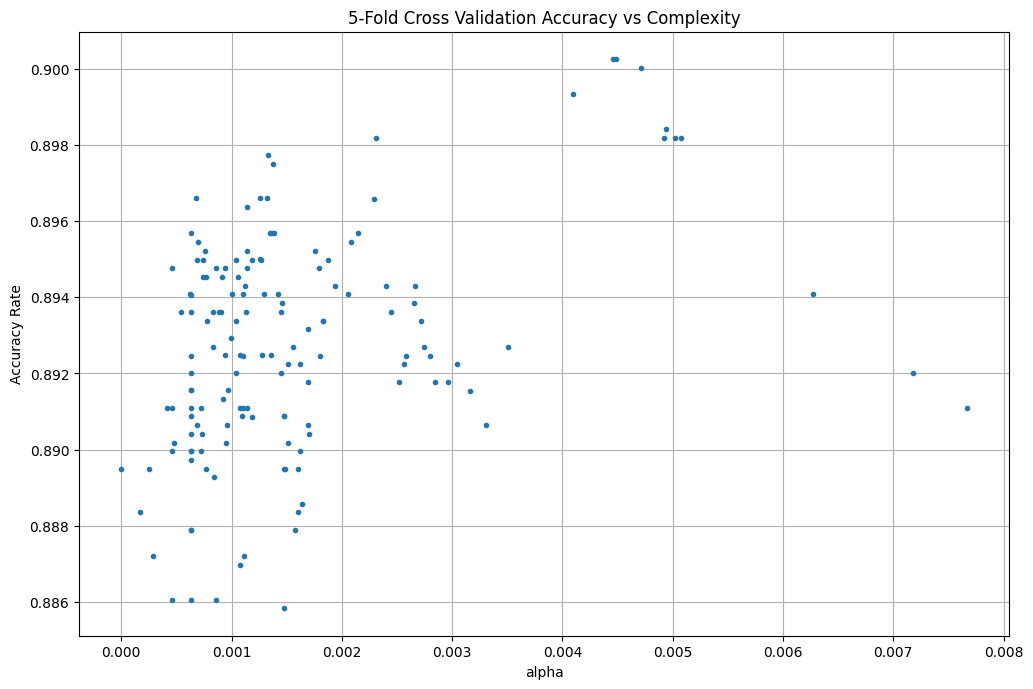

In [24]:
opt_index = accuracy.index(max(accuracy))

plt.grid(True)
remove = 15
plt.plot(path['ccp_alphas'][:-remove], accuracy[:-remove], '.')
#plt.plot(path['ccp_alphas'][opt_index]+0.0001, accuracy[opt_index], '<')
plt.xlabel('alpha')
plt.ylabel('Accuracy Rate')
plt.title('5-Fold Cross Validation Accuracy vs Complexity');

- Question: What value of alpha corresponds to the best accuracy? (numeric)

$$\\[0.5in]$$


- Sometimes (not here) there is a leveling off in accuracy
    - Leveling off would indicate that within a range of model complexity, there is similar accuracy
    - If this occurs, chose the simplest model that achieves the optimal accuracy


- Here: it is pretty clear which is the ideal model (orange arrow pointing to it when hash removed in code)


- Below: I'm choosing to use the optimal tree


- Note: [Graphviz and the dot](https://graphviz.org) language can be very fast for making tree and other diagram graphics


- Presentation: This tree below could be improved by using better variable names

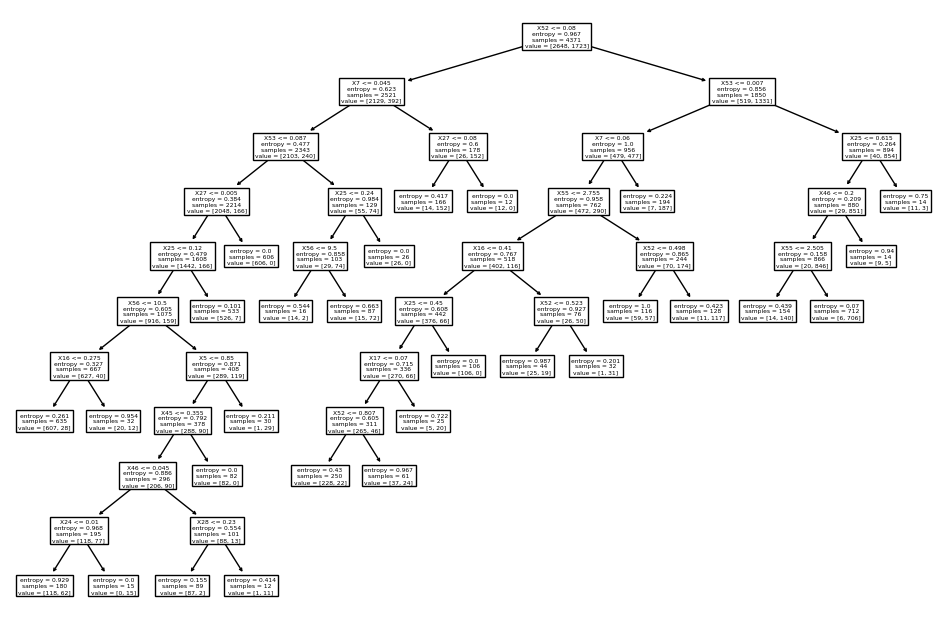

In [25]:
clf = tree.DecisionTreeClassifier(
    criterion='entropy', ccp_alpha=path['ccp_alphas'][opt_index])
clf = clf.fit(train_set.drop(columns='Y'), train_set['Y'])
tree.plot_tree(clf, feature_names=train_set.columns);

- Question: Is this publication quality?
    - A. Yes
    - B. No

$$\\[0.5in]$$

- Question: What can be done to make this publication quality? (text)

$$\\[0.5in]$$

- Notice that we cannot read what it says


- It seems likely that the client would like to see it up close


- We can export a standalone graphic for closer inspection


- Note: must have graphviz program (not only python module) installed on system to output this graph

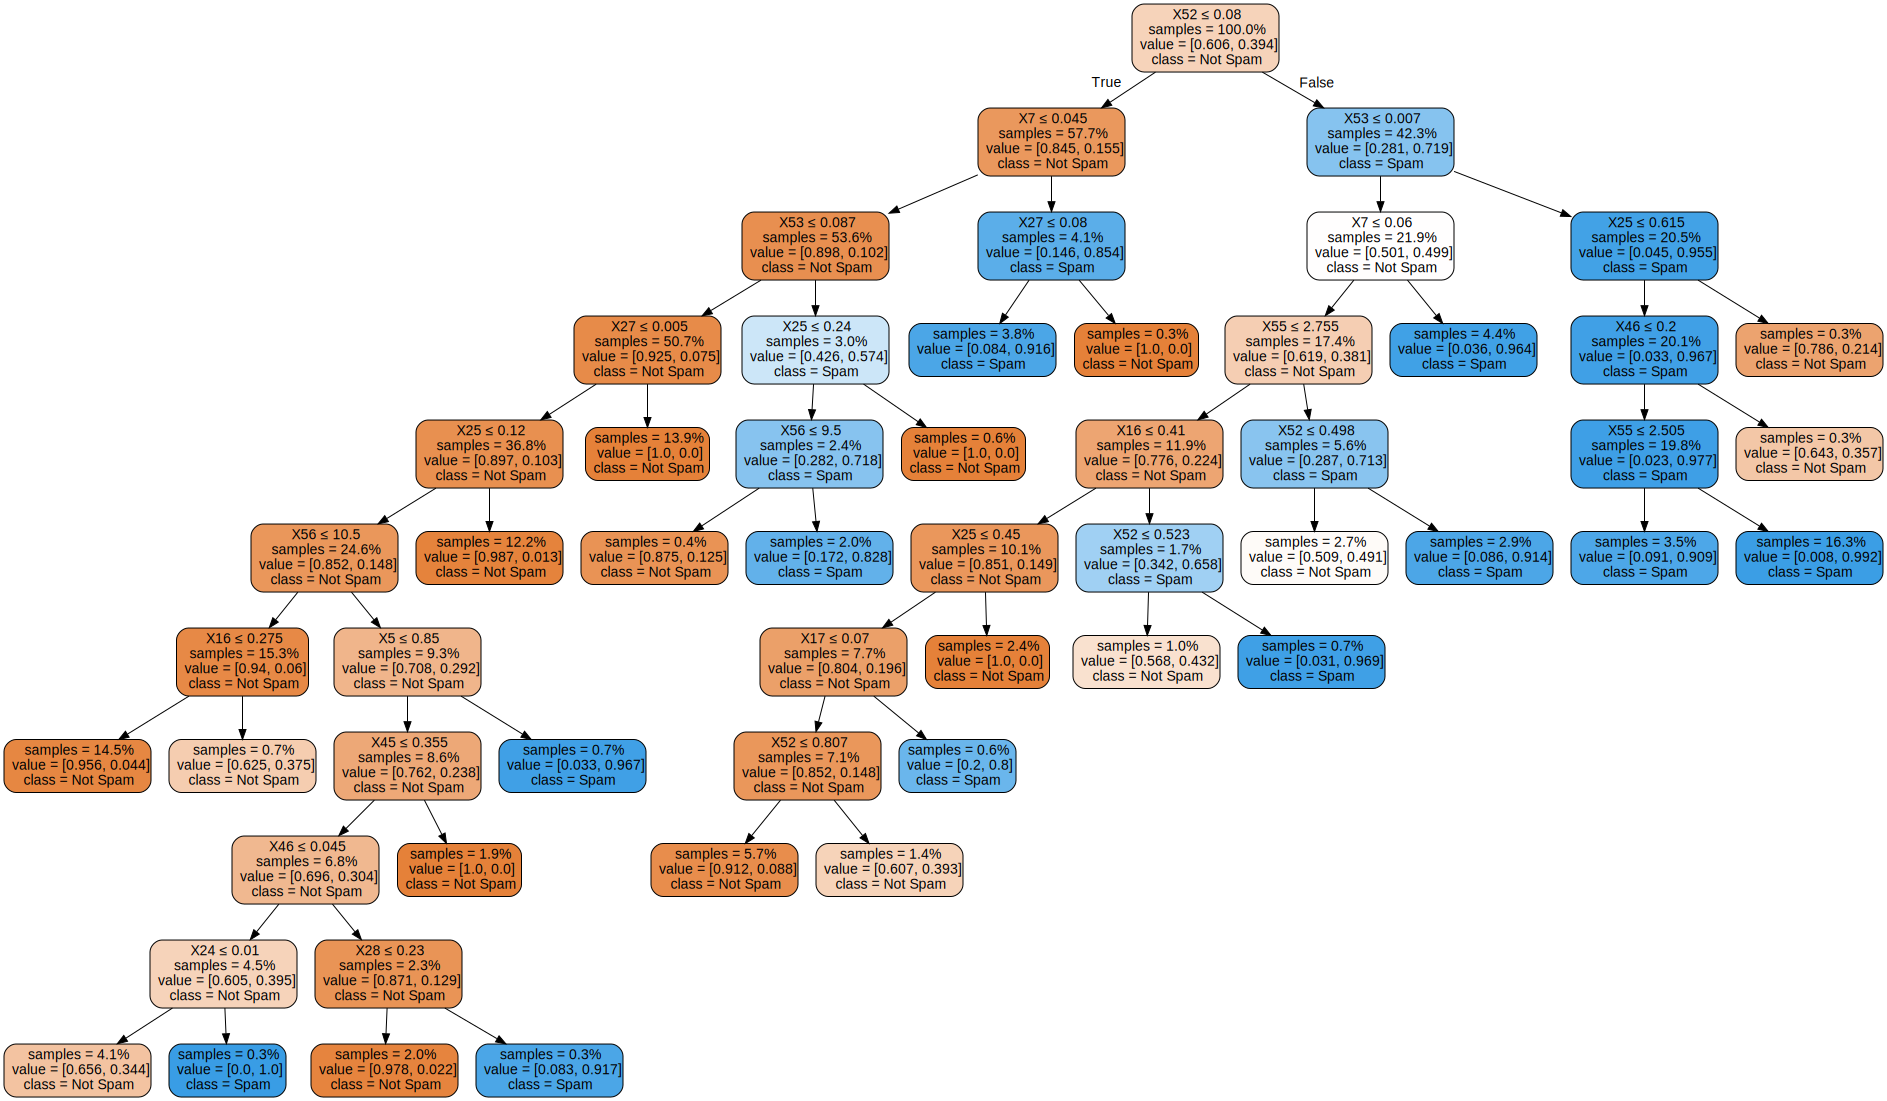

In [26]:
dot_data = tree.export_graphviz(
    clf, out_file=None, feature_names=train_set.columns[:-1], impurity=False,
    class_names=['Not Spam', 'Spam'], filled=True, rounded=True, proportion=True,
    special_characters=True)  
graphviz.Source(dot_data)

- Question: How can this graphic be improved? (text)

$$\\[0.5in]$$

**Validation**

- Now that we have chosen a model, we should validate on test set


- Leaf nodes will not be 'pure' (they will have a mix of spam and not spam)


- We can use this a probability of spam


- Here: I will use the majority as classification

In [27]:
pred = clf.predict(test_set.drop(columns='Y'))
print(f'Average error: {np.round(np.mean(~(pred == test_set.Y)), 3)}')
print(f'Average accuracy: {np.round(np.mean(pred == test_set.Y), 3)}')

Average error: 0.048
Average accuracy: 0.952


- This tree classifier was wrong 4.8% of the time

- Question: Would logistic (ridge) regression do a better job (greater accuracy) here?
    - A. Yes
    - B. No
    - C. Not sure


$$\\[0.5in]$$

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

#scaling for ridge regression
scaler = preprocessing.StandardScaler().fit(train_set.drop(columns='Y'))
X_scaled = scaler.transform(train_set.drop(columns='Y'))

# running the regression with cross validation
lgstc = LogisticRegression(random_state=0, penalty='l2').fit(X_scaled, train_set['Y'])

# scaling test data
test_scaler = preprocessing.StandardScaler().fit(test_set.drop(columns='Y'))
X_test_scaled = test_scaler.transform(test_set.drop(columns='Y'))
lgstic_pred = lgstc.predict(X_test_scaled)

print(f'Average error: {np.round(np.mean(~(lgstic_pred == test_set.Y)), 3)}')
print(f'Average accuracy: {np.round(np.mean(lgstic_pred == test_set.Y), 3)}')

Average error: 0.074
Average accuracy: 0.926


- This classifier is close but not as good as a tree model


- Question: Why might a tree model be better than logistic regression? (text)

$$\\[0.5in]$$

### Decision boundary: Decision Trees vs Regression

- There are benefits and draw backs to both


- How do you choose which to use?


- There are a lot criteria to consider
    - which does the client prefer?
    - which does a better job of prediction?
    - do we need to use inference?


- If one does a much better job at prediction, that gives clues about the data and the model [*decision boundary*](https://en.wikipedia.org/wiki/Decision_boundary)

![tree](https://littleml.files.wordpress.com/2016/06/model_boundary_radial.png)
![logistic](https://littleml.files.wordpress.com/2016/06/lr_boundary_radial.png)
![](https://littleml.files.wordpress.com/2016/06/model_boundary_linear.png)
![](https://littleml.files.wordpress.com/2016/06/lr_boundary_linear.png)

**Issues with Trees**
- Instability 
    - small changes in the data can result in very different trees
    - This can make interpretation seem random


- Lack of smoothness
    - Trees can also be used to predict continuous responses as well
    - When the response is continuous, small changes in the input variables can results in jumps in the response

#### Questions

- Which of the following are true about decision trees compared to GLMs? (select all that apply)
    - A. Low bias
    - B. High bias
    - C. Low variance
    - D. High variance

$$\\[0.5in]$$


- In general, tree have lower out-of-sample MSE.
    - A. True
    - B. False
    - C. Not sure


$$\\[0.5in]$$

- If $X$ and $Y$ are random vectors such that $I(X,Y) > 0$, then (select all that apply)
    - A. $X$ and $Y$ are independent
    - B. $X$ can be used to predict $Y$
    - C. $H(X)+H(Y)>0$
    - D. $Cov(X,Y) \neq 0$
    - E. $Y$ can be used to predict $X$


$$\\[0.5in]$$

- People tend to find trees intuitive to understand
    - A. True
    - B. False


## AdaBoost


- Ensemble method: uses many learners to construct model, usually trees both other methods work too


- Typically uses a *lazy learner model* (a model whose error rate slightly better than a random guess), e.g. decision tree with one split or logistic regression with one variable


- Question: Which could be examples of lazy learners? (select all that apply)
    - A. decision tree with one split
    - B. neural network with one hidden layer
    - C. logistic regression with one variable
    - D. logistric ridge regression
    - E. full decision tree


$$\\[0.5in]$$


- Lazy learner is applied to training data many times


- Each time the lazy learner is applied, observations in the data are weighted, $w_i$, using depending on if it was correctly classified    


- Observation $i$ is given a greater weight, $w_i$, if it was incorrectly classified and a smaller weight if it was correctly classified


- Weights are used in the fitting process to encourage models correct what they misclassified previously


- By increasing the weights of misclassified observations, the lazy learner is encouraged to focus on what it previously got wrong


- Each sequential lazy learner uses the weights generated from the error of previous lazy learner


- Loss is greater for observations with greater weights


- Each sequential lazy learner is an assigned an error score, $\alpha_m$, based on its accuracy using the observation weights


- Output: weighted average of all models

$$\\[0.5in]$$

**AdaBoost.M1 Algorithm:**

Data: $(x_1, y_1), \dots, (x_n, y_n)$ with $y_i\in\{-1,1\}$

Let $G_m$ for $m=1,\dots,M$ be a type of classifier with $G_m(x)\in\{-1,1\}$

1. Initialize all observations with weight $w_i^{(1)}=\frac{1}{n}$ for $i=1,\dots, n$

2. For $m =1, \dots, M$:

    1. Fit $G_m(x)$ over the class $\mathcal F$ of lazy learners to the training data using weights, $w_i^{(m)}$: $$G_m(x) = {\arg\min}_{f\in \mathcal F} \sum_{i=1}^n w_i^{(m)} I(y_i\neq f(x_i))$$
    
    2. Compute $$\text{err}_m = \frac{\sum_{i=1}^n w_i^{(m)} I(y_i\neq G_m(x_i))}{\sum_{i=1}^n w_i^{(m)}}$$
    
    3. Set model score $$\alpha_m = \frac{1}{2}\log\left(\frac{1-\text{err}_m}{\text{err}_m}\right)$$
    
    4. Re-weight observations $$w_i^{(m+1)} \leftarrow \frac{w_i^{(m)}\exp\left[-\alpha_m y_i G_m(x_i)\right]}{C_m}$$ where $C_m$ is a constant so that $\sum_{i=1}^n w_i^{(m+1)}=1$


3. AdaBoost model: $$G(x) = \text{sign}\left(\sum_{m=1}^M \alpha_m G_m(x)\right)$$

Note: 
- This algorithm can be modified to continuous outcomes too

- Question: Will the aggregate be a better predictor than its components?
    - A. Yes
    - B. No
    - C. Not sure

$$\\[0.5in]$$

- Question: Will the aggregate be more interpretable than its components?
    - A. Yes
    - B. No
    - C. Not sure

$$\\[0.5in]$$

**AdaBoost Illustration**

![](https://static.packt-cdn.com/products/9781788295758/graphics/image_04_046-1.png)

**AdaBoost Accuracy**

- Training error $$\text{error}_{\text{train}}(G) = \frac{1}{n}\sum_{i=1}^n I(G(x_i)\neq y_i)$$


- We can show that $$\frac{1}{n}\sum_{i=1}^n I(G(x_i)\neq y_i) \leq \frac{1}{n}\sum_{i=1}^n \exp(-y_i G(x_i)) = \prod_{m=1}^M \left(\sum_{i=1}^n w_i^{(m)}\exp(-\alpha_m y_i G_m(x_i))\right)$$


- $w_i^{(m)}$ and $\alpha_m$ were chosen to adaptively tighten this bound as the algorithm iterates


- Freund & Shapire (1999) showed that with high probability, $$\text{error}_{\text{test}}(G) \leq \text{error}_{\text{train}}(G) + O\left(\sqrt{\frac{M \cdot \text{VC dim}(\text{Learner})}{n}}\right)$$



- [VC dimension](https://en.wikipedia.org/wiki/Vapnik–Chervonenkis_dimension) is a way to quantify model class flexibility


- Question: As VC dimension of the component learner increases test error (choose one)
    - A. Increases
    - B. Decreases
    - C. Does not change
    - D. Not sure

$$\\[0.5in]$$

- Question: A lazy learner has (blank) VC dimension (choose one)
    - A. High
    - B. Low
    - C. Not sure

$$\\[0.5in]$$


- High VC dimension means a model is very flexible


- This inequality explains why we want to use lazy learner: they have low VC dimension


- This inequality shows that overfitting with AdABoost is bounded
    
Below:


- The code uses spam training data to build AdaBoost models using trees of depth 1 and trees of depth 5


- The graph shows the AdaBoost aggregate accuracy for an ensemble using $m$ sequential lazy learners


- A comparison of the plots illustrates the test error bound above


- In practice, cross validation should be used to choose the number of learners


- Due to the theoretical bound, lazy learners are nearly alway used

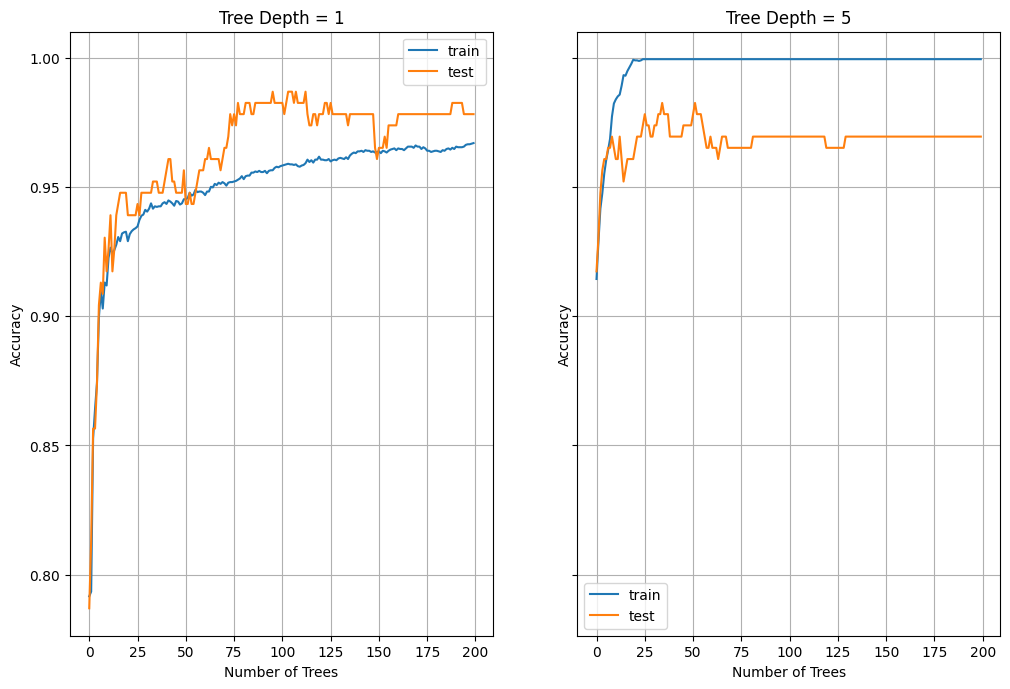

In [29]:
from sklearn.ensemble import AdaBoostClassifier

depth = [1, 5]

fig, axs = plt.subplots(1, 2, sharey=True)

for itr in range(2):
    learner = tree.DecisionTreeClassifier(
        criterion='entropy', max_depth=depth[itr])
    clf = AdaBoostClassifier(learner, n_estimators=200)
    clf.fit(train_set.drop(columns='Y').values, train_set['Y'])

    train_accuracy = list(clf.staged_score(
        train_set.drop(columns='Y').values, train_set['Y']))
    test_accuracy = list(clf.staged_score(
        test_set.drop(columns='Y').values, test_set['Y']))

    axs[itr].plot(train_accuracy, label='train')
    axs[itr].plot(test_accuracy, label='test')
    axs[itr].legend()
    axs[itr].set_title(f'Tree Depth = {depth[itr]}')
    
for ax in fig.get_axes():
    ax.label_outer()
    ax.grid(True)
    
for ax in axs.flat:
    ax.set(xlabel='Number of Trees', ylabel='Accuracy');

- The ensemble with trees of depth=1 seems to perform better on the test data


- The ensemble with trees of depth=5 clearly overfit on the train data


- Recall that spam accuracy for a single decision tree was 0.952


- Below: accuracy on depth=1 ensemble with 200 trees

In [30]:
np.round(test_accuracy[-1], 3)

0.97

### Other Boosting Strategies

- More generally, boosting methods are sequential ensemble methods that attempt to use the previous model's error to improve the ensemble's accuracy on new data


- For example, we could use build sequential models based on the previous models residual error as with *forward stagewise additive modeling*


- *Gradient Boosting* is a related example where the gradient (derivative) of the loss function with respect to the previous model is used improve the current model


- We will talk more about boosting in the next section on causal inference


## Random Forest


- Question: Have you learned about random forests before?
    - A. Yes
    - B. No

$$\\[0.5in]$$


- Also an ensemble method but not sequential


- Generate bootstrap samples and builds a decision tree on each


- Question: Which of the follow are true for bootstrap sampling from data with $n$ observation? (choose all that apply)
    - A. Randomly choosing rows of data with replacement
    - B. Randomly choosing rows of data without replacement
    - C. Randomly choosing $n$ rows of data
    - D. Randomly choosing less than $n$ rows of data


$$\\[0.5in]$$



- Builds many trees
    - on a random sample of the observations with replacement (bootstrap sample)
    - on using a subset of the variables
    - typically does not prune each tree


- Can be parallelized (adaBoost cannot)


- Random forests (RF) are very simple to understand and implement


- In my experience, they consistently top performers in many settings



**Algorithm:**

Data: $(x_1,y_1),\dots, (x_n,y_n)$

Hyperparameters to choose:


- $B$, number of bootstrap sample/trees to build


- $m$, number of variables to randomly give each each bootstrap sample/tree


- max tree depth or min number of nodes


1. For $b=1,\dots, B$: $$$$
    1. Bootstrap: Re-sample data with replacement to get $n$ observations (there will be repeats) $$$$
    2. Use the bootstrap sample to build a tree, $T_b(x)$: for each node, repeat the following steps until a minimum node size, $n_{\text{min}}$ is achieved $$$$
        1. Choose a subset of $m$ variables randomly from the $p$ variables in the data $$$$
        2. Of the $m$ variables choose the best variable/split-point using Gini or entropy $$$$
        3. Branch node and split data accordingly $$$$
2. $\hat f_{\text{RF}}^B(x) = \frac{1}{B}\sum_{b=1}^B T_b(x)$ or majority vote $$$$


- Quesition: Large bootstrap sample trees are noisy
    - A. True
    - B. False
    - C. Not sure

$$\\[0.5in]$$

- Question: Large boostrap sample trees have low bias
    - A. True
    - B. False
    - C. Not sure

$$\\[0.5in]$$

- Question: Tree averaging reduces model variance
    - A. True
    - B. False
    - C. Not sure

$$\\[0.5in]$$

- Intuition:
    - Tree can be noisy (they can change dramatically with small changes in data)
    - But, they have low bias because with enough depth, they can be very flexible
        - Bias: *expected* predictions are close to the true regression function
    - Trees are very good at capturing complex interactions in the data
    - When we randomly resample data (bootstrapping), the expected prediction values stays the same
    - By averaging many trees, we reduce noise (variance) while keeping bias low
Related to RFs:
- *Out of bag sample*: because any given tree in an RF will not use each observation, it is possible to use the training data to test the accuracy of the ensemble
    - For each observation in the training data, find the subset tree in the RF that did **not** use it to train
    - Get a prediction for that observation on the subset of trees
    - Do this for each observation
- Variable importance: this metric shows how effective each variable is predicting the response
    - Tree ensemble methods quantify the improvement in the split-criterion at each split
    - Variable importance aggregates this over all trees

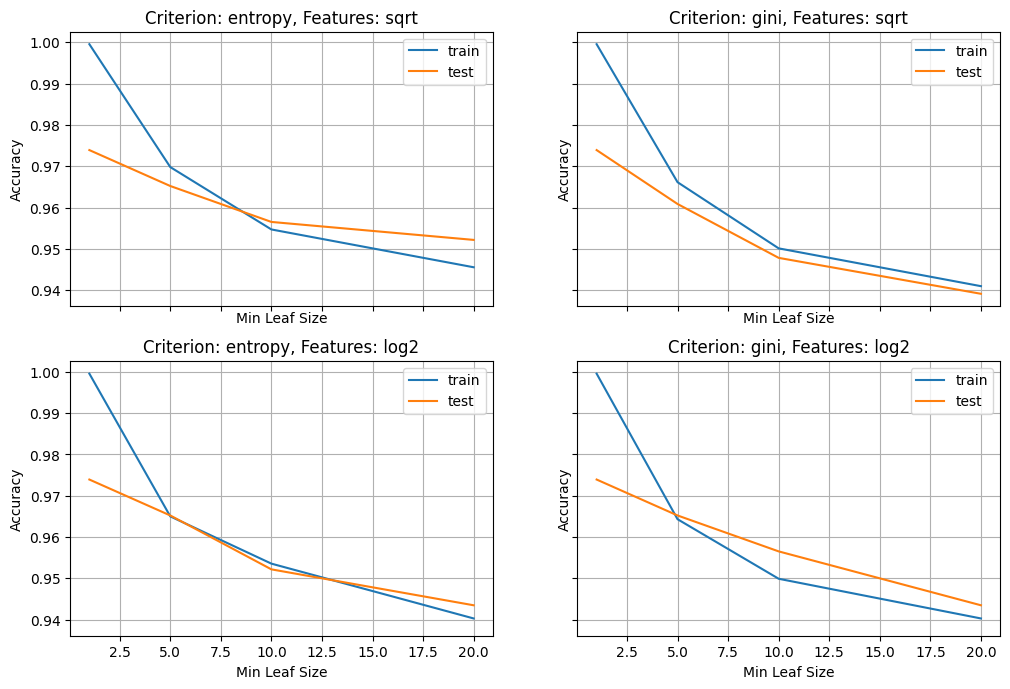

In [31]:
from sklearn.ensemble import RandomForestClassifier

oob_acc = []
test_acc = []

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs = axs.ravel()
itr = 0

leaf_size = [1,5,10,20]

for feat in ['sqrt', 'log2']:
    for crit in ['entropy', 'gini']:
        for leaf in leaf_size:
            clf = RandomForestClassifier(
                n_estimators = 200, min_samples_leaf=leaf, 
                criterion=crit, max_features=feat,
                random_state=0, oob_score=True, n_jobs=-1)
            clf.fit(train_set.drop(columns='Y'), train_set['Y'])
            train_accuracy = clf.score(
                train_set.drop(columns='Y'), train_set['Y'])
            test_accuracy = clf.score(
                test_set.drop(columns='Y'), test_set['Y'])
            oob_acc.append(train_accuracy)
            test_acc.append(test_accuracy)
        axs[itr].plot(leaf_size, oob_acc, label='train')
        axs[itr].plot(leaf_size, test_acc, label='test')
        axs[itr].legend()
        axs[itr].set_title(f'Criterion: {crit}, Features: {feat}')
        oob_acc.clear()
        test_acc.clear()
        itr += 1

for ax in fig.get_axes():
    ax.label_outer()
    ax.grid(True)
    
for ax in axs.flat:
    ax.set(xlabel='Min Leaf Size', ylabel='Accuracy');

- Question: Of the models we looked at, which model should we use?
    - A. Decision tree
    - B. Logistic ridge regression
    - C. AdaBoost
    - D. Random Forest

$$\\[0.5in]$$

- Question: How should we choose a final model to give our clients? (text)

$$\\[0.5in]$$



Notes based on Tom Mitchell ML 10-701 course at CMU and [Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)